# EDA - Used Cars Dataset

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler

## 1. Loading data

In [2]:
data = pd.read_csv("used_cars.csv")

In [3]:
data.shape

(4009, 12)

In [4]:
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### Check the info of the data

In [5]:
# Check for missing data and data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


**Observation**
- There are 4099 rows and 12 columns in the data
- We have missing values in fuel_type, accident and clean_title columns
- The mileage and price columns are currently stored as string data types since they have units stored along with the values. We need to drop these units and transform these columns into numeric. 
- The model_year column is of numeric data type but is actually categorical. We can transform the model year into a new column representing the age of the car. We can also drop miles from mileage column values and convert these into numeric.

## 2. Pre-processing and EDA

In [6]:
data['brand'].nunique()

57

In [7]:
data['model'].nunique()

1898

- The column 'model' is of object data type and contains a lot of unique values, hence we can drop this column as they don't add much value to our analysis.

In [8]:
# Drop the car model column for our analysis
data_copy = data.copy()
data = data.drop('model', axis = 1)

### 2.1 Convert accident column to numeric

In [9]:
data['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [10]:
# Check the missing value count in accident column
data['accident'].isna().sum()

113

In [11]:
def convert_accident_to_numeric(text):
    if text == 'None reported':
        return 0
    elif text == 'At least 1 accident or damage reported':
        return 1
    else:
        return np.nan

In [12]:
data['accident'] = data['accident'].apply(convert_accident_to_numeric)

In [13]:
cars_with_accident = (data['accident'] == 1).sum()
print('Number of cars with accidents reported = ',cars_with_accident)
round((cars_with_accident / data.shape[0]) * 100,2)

Number of cars with accidents reported =  986


24.59

In [14]:
cars_without_accident = (data['accident'] == 0).sum()
print('Number of cars with no accidents reported = ',cars_without_accident)
round((cars_without_accident / data.shape[0]) * 100,2)

Number of cars with no accidents reported =  2910


72.59

- 24.6% of cars have at least 1 accident reported and 
- 72.6% cars have no accidents reported

### 2.2 Convert price and mileage columns to numeric

In [15]:
def convert_to_numeric(value):
    if 'mi.' in value:
        mileage = value.replace('mi.', '').replace(',', '').strip()
        return float(mileage)
    elif '$' in value:
        price = value.replace('$', '').replace(',', '').strip()
        return float(price)
    else:
        return -1

In [16]:
# Convert milage column to numeric and drop the original column
data['mileage'] = data['milage'].apply(convert_to_numeric)
data = data.drop('milage', axis = 1)

In [17]:
data['price'] = data['price'].apply(convert_to_numeric)

### 2.3 Convert model_year column to age column

In [18]:
def convert_year_to_age(model_year):
    return datetime.datetime.now().year - model_year

In [19]:
data['age'] = data['model_year'].apply(convert_year_to_age)
data = data.drop('model_year', axis = 1)

In [20]:
data.head()

,brand,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,mileage,age
0,Ford,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1.0,Yes,10300.0,51000.0,11
1,Hyundai,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1.0,Yes,38005.0,34742.0,3
2,Lexus,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0.0,NaN,54598.0,22372.0,2
3,INFINITI,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0.0,Yes,15500.0,88900.0,9
4,Audi,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0.0,NaN,34999.0,9835.0,3


### 2.4 Convert fuel_type column to numerical type

In [21]:
data['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [22]:
data['fuel_type'].nunique()

7

### 2.5 Drop clean_title column and missing values in accident and fuel_type columns

**Check the count and percentage of missing values in the dataset**

In [23]:
data.isna().sum()

brand             0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
mileage           0
age               0
dtype: int64

In [24]:
data.isnull().mean() * 100

brand            0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
mileage          0.000000
age              0.000000
dtype: float64

In [25]:
# Drop the rows where accident and fuel_type columns have missing values
data1 = data.dropna(subset = ['accident', 'fuel_type'])
data1.shape

(3730, 11)

In [26]:
# Check the missing value count in clean_title column after this step
data1['clean_title'].isna().sum()

461

- The number of missing values have reduced after the previous step. But we cannot drop all these rows as they comprise a major portion of our data. We will drop this column instead. 

In [27]:
# We are also dropping the milage column as we have already created new mileage column after removing the units
data1 = data1.drop('clean_title', axis = 1)

In [28]:
data1.shape

(3730, 10)

In [29]:
# Lets check the data type and missing count 
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3730 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3730 non-null   object 
 1   fuel_type     3730 non-null   object 
 2   engine        3730 non-null   object 
 3   transmission  3730 non-null   object 
 4   ext_col       3730 non-null   object 
 5   int_col       3730 non-null   object 
 6   accident      3730 non-null   float64
 7   price         3730 non-null   float64
 8   mileage       3730 non-null   float64
 9   age           3730 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 320.5+ KB


- After cleaning, data has 3,730 rows and 10 columns

### 2.6 Summary Statistics

In [30]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
accident,3730.0,0.262198,0.439889,0.0,0.00,0.0,1.00,1.0
price,3730.0,43980.914745,81022.327768,2000.0,16777.50,30000.0,48500.00,2954083.0
mileage,3730.0,66901.512332,52677.339854,100.0,24795.25,55167.0,96475.25,405000.0
age,3730.0,8.700268,6.104940,0.0,4.00,7.0,12.00,50.0


**Observation**
- Average price of car is around 44,000. Standard deviation is large (81K) which shows high variation in prices
- Price column has extreme outliers as the maximum price is much higher than 75th percentile 
- Average mileage is around 67,000
- Average age of car is 8.7 years
- Accident column has only 0 and 1 values corresponding to no accidents and at least 1 accident

price
Skew : 19.24


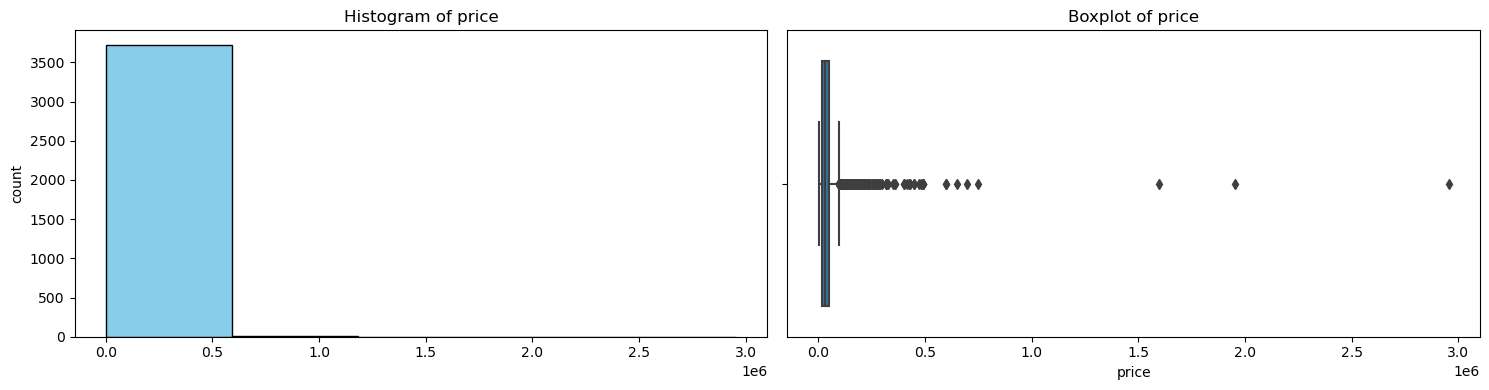

mileage
Skew : 1.12


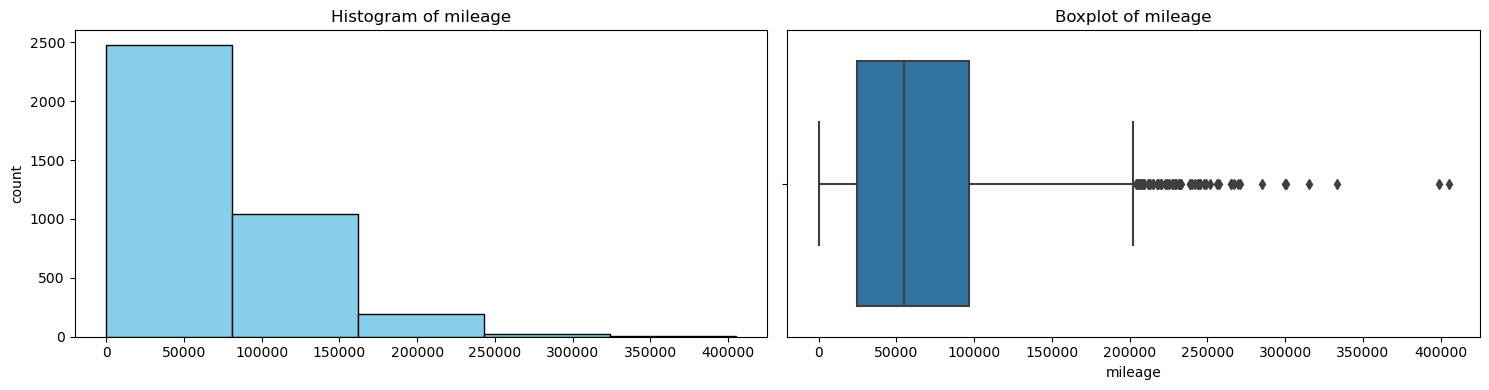

age
Skew : 1.06


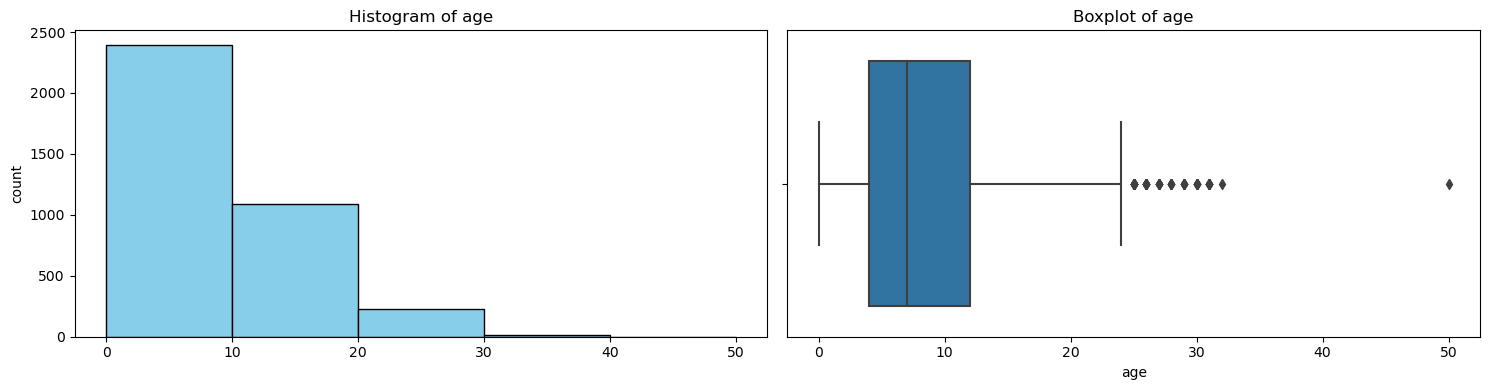

In [31]:
for col in ['price', 'mileage', 'age']:
    print(col)
    print('Skew :',round(data1[col].skew(),2))
    
    # Plotting
    plt.figure(figsize=(15,4))
    
    # Histogram
    plt.subplot(1,2,1)
    data1[col].hist(bins=5, grid=False, color='skyblue', edgecolor='black')
    plt.ylabel('count')
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data1[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

**Observation**
- Price column is extremely right skewed and has many outliers
- Mileage and age columns are right skewed
- 

### 2.7 Correlation Analysis    

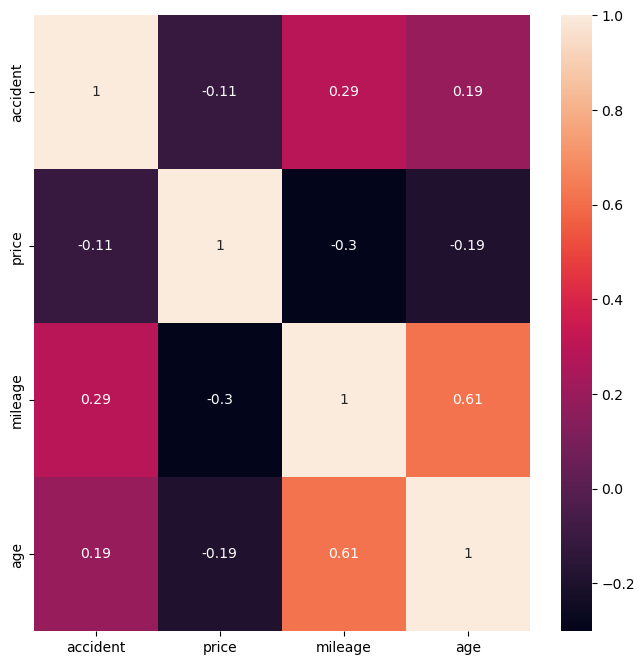

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(data1.corr(), annot=True)
plt.show()

**Observation**
- Price has negative correlation with mileage and age
- Mileage has positive correlation with age (Older the car, higher the mileage)

## Scaling the data

In [33]:
data1.columns

Index(['brand', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col',
       'accident', 'price', 'mileage', 'age'],
      dtype='object')

In [34]:
# Drop the categorical column before standardising the numerical columns
data1 = data1.drop(columns = ['brand', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col',
       'accident'], axis = 1)

In [35]:
# scaling the data
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)

In [36]:
data_scaled.head()

,price,mileage,age
0,-0.415755,-0.301907,0.376751
1,-0.073766,-0.610582,-0.933839
2,0.131057,-0.845439,-1.097663
3,-0.351566,0.417664,0.049103
4,-0.110872,-1.083467,-0.933839
